In [3]:
import sys

sys.path.insert(0, '/Users/Cinus/Work/Progetti/WoMG/WoMG/src/')
import test_version

In [5]:
dir(test_version)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__main__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'womg']

In [8]:
from test_version import womg

In [11]:
import numpy as np
#import womg
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
N = 100
g = nx.random_geometric_graph(N, .3)
docs_path = '../womg/womgdata/docs/demo_corpus/'
prop = womg(graph=g, int_mode='nmf', homophily=0., virality_resistance=13, virality_exp=8., 
          infl_strength=12., gn_strength=13,
          docs_path=docs_path, save_int=True, seed=42, single_activator=False)

Formatting graph..
Creating interests..
Extracting topic distribution from docs in  ../womg/womgdata/docs/demo_corpus


100%|██████████| 2/2 [00:00<00:00, 323.10it/s]

Computing cascades.. 
WoMG diffusion has been completed.


In [10]:
NODE_SIZE = 600
pos = nx.get_node_attributes(g, 'pos')

def plot_graph(node_color, cmap):
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_edges(g, pos, alpha=0.4)
    nx.draw_networkx_nodes(g,
                           pos=pos,
                           node_size=NODE_SIZE,
                           alpha=1.0,
                           node_color=node_color,
                           cmap=cmap,
                           edgecolors='k'
                          )
    plt.axis('off')  

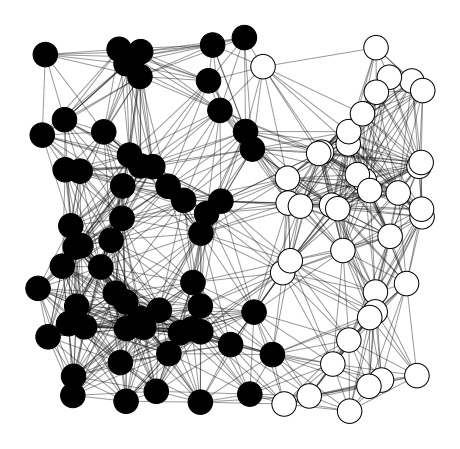

In [13]:
item = 0
activations = np.zeros(N)
active_nodes = [node for _time, node in prop.propagations[item]]
activations[active_nodes] = 1
plot_graph(activations, plt.cm.binary)

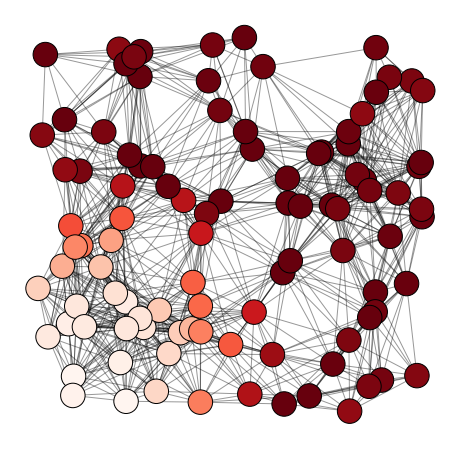

In [14]:
component = np.argmax(prop.topic_distributions[:,item])
component_interest = [prop.interests[component,node] for node in range(N)]
plot_graph(component_interest, plt.cm.Reds_r)

In [ ]:
! rm -r ../Output/